## Data Analysis: Novel Corona Virus 2020

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline

In [78]:
# First DataFrame is from the the actual COVID19 Counts dataset
df_India= pd.read_csv('covid_19_India.csv')

# Second DataFrame is for the India map
India_coord = pd.read_excel('Indian Coordinates.xlsx')

In [79]:
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       2450 non-null   int64 
 1   Date                      2450 non-null   object
 2   Time                      2450 non-null   object
 3   State/UnionTerritory      2450 non-null   object
 4   ConfirmedIndianNational   2450 non-null   object
 5   ConfirmedForeignNational  2450 non-null   object
 6   Cured                     2450 non-null   int64 
 7   Deaths                    2450 non-null   int64 
 8   Confirmed                 2450 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 172.4+ KB


In [47]:
India_coord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name of State / UT  35 non-null     object 
 1   Latitude            35 non-null     float64
 2   Longitude           35 non-null     float64
dtypes: float64(2), object(1)
memory usage: 968.0+ bytes


In [80]:
df_India.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,02-01-20,6:00 PM,Kerala,2,0,0,0,2
3,4,02-02-20,6:00 PM,Kerala,3,0,0,0,3
4,5,02-03-20,6:00 PM,Kerala,3,0,0,0,3


In [50]:
India_coord.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [77]:
df_India.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2445,2446,29/05/20,08:00:00,Tripura,-,-,165,0,230
2446,2447,29/05/20,08:00:00,Uttarakhand,-,-,79,4,469
2447,2448,29/05/20,08:00:00,Uttar Pradesh,-,-,3991,182,6991
2448,2449,29/05/20,08:00:00,West Bengal,-,-,1578,289,4192
2449,2450,29/05/20,08:00:00,Cases being reassigned to states,-,-,0,0,4332


In [51]:
India_coord.tail()

,Name of State / UT,Latitude,Longitude
30,Tripura,23.835404,91.279999
31,Uttar Pradesh,27.599981,78.050006
32,Uttarakhand,30.320409,78.050006
33,West Bengal,22.580390,88.329947
34,Union Territory of Ladakh,34.100000,77.340000


In [11]:
df_India.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [52]:
India_coord.dtypes

Name of State / UT     object
Latitude              float64
Longitude             float64
dtype: object

In [81]:
df_India.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sno,2450.0,1225.500000,707.398403,1.0,613.25,1225.5,1837.75,2450.0
Cured,2450.0,423.193469,1381.069153,0.0,1.00,14.0,152.75,17918.0
Deaths,2450.0,37.957551,149.523847,0.0,0.00,1.0,11.00,1897.0
Confirmed,2450.0,1227.379184,4187.451290,0.0,7.00,53.5,647.00,56948.0


In [53]:
India_coord.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Latitude,35.0,22.827205,6.971512,8.900373,18.681316,23.835404,27.466655,34.100000
Longitude,35.0,82.021144,7.371870,72.636867,76.674999,78.570026,88.473297,94.216667


In [82]:
df_India.shape

(2450, 9)

In [54]:
India_coord.shape

(35, 3)

In [57]:
print(df_India.index)
print('')
print(df_India.columns)

RangeIndex(start=0, stop=2450, step=1)

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')


In [58]:
print(India_coord.index)
print('')
print(India_coord.columns)

RangeIndex(start=0, stop=35, step=1)

Index(['Name of State / UT', 'Latitude', 'Longitude'], dtype='object')


In [59]:
df_India[df_India.isnull()].count()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [61]:
India_coord[India_coord.isnull()].count()

Name of State / UT    0
Latitude              0
Longitude             0
dtype: int64

In [62]:
df_India.skew(numeric_only=True)

Sno          0.000000
Cured        6.501247
Deaths       7.396817
Confirmed    7.843507
dtype: float64

In [84]:
df_India.nunique()

Sno                         2450
Date                         121
Time                           7
State/UnionTerritory          37
ConfirmedIndianNational       62
ConfirmedForeignNational      12
Cured                        612
Deaths                       249
Confirmed                    928
dtype: int64

In [68]:
India_coord.nunique()

Name of State / UT    35
Latitude              35
Longitude             34
dtype: int64

In [90]:
def replace_dash_with_zeros(inp):
    return inp.replace("-",int(0))

df_India['Date'] = pd.to_datetime(df_India['Date'])

    

df_India['ConfirmedIndianNational'] = df_India[df_India['ConfirmedIndianNational'] == '-'].apply(replace_dash_with_zeros)
df_India['ConfirmedForeignNational'] = df_India[df_India['ConfirmedForeignNational'] == '-'].apply(replace_dash_with_zeros)
df_India.sort_values("Confirmed", ascending = False, inplace = True)

df_India

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2397,2398,2020-05-28,8:00 AM,Maharashtra,2398,2398,17918,1897,56948
2433,2434,2020-05-29,8:00 AM,Maharashtra,2434,2434,17918,1897,56948
2361,2362,2020-05-27,8:00 AM,Maharashtra,2362,2362,16954,1792,54758
2325,2326,2020-05-26,8:00 AM,Maharashtra,2326,2326,15786,1695,52667
2290,2291,2020-05-25,8:00 AM,Maharashtra,2291,2291,14600,1635,50231
...,...,...,...,...,...,...,...,...,...
1047,1048,2020-04-17,5:00 PM,Nagaland,1048,1048,0,0,0
1179,1180,2020-04-21,5:00 PM,Nagaland,1180,1180,0,0,0
981,982,2020-04-15,5:00 PM,Nagaland,982,982,0,0,0
1113,1114,2020-04-19,5:00 PM,Nagaland,1114,1114,0,0,0


In [92]:
df_India.loc[df_India["ConfirmedForeignNational"] == "-",:]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed


In [93]:
list(zip(df_India.columns,df_India.dtypes,df_India.isna().sum()))

[('Sno', dtype('int64'), 0),
 ('Date', dtype('<M8[ns]'), 0),
 ('Time', dtype('O'), 0),
 ('State/UnionTerritory', dtype('O'), 0),
 ('ConfirmedIndianNational', dtype('O'), 446),
 ('ConfirmedForeignNational', dtype('O'), 446),
 ('Cured', dtype('int64'), 0),
 ('Deaths', dtype('int64'), 0),
 ('Confirmed', dtype('int64'), 0)]

In [101]:
print(f'We have data available from {df_India.Date.min()} hrs to {df_India.Date.max()} hrs')

We have data available from 2020-01-30 00:00:00 hrs to 2020-05-29 00:00:00 hrs


In [102]:
df_India.groupby(["State/UnionTerritory", "Date"]).sum()

Sno  Cured  Deaths  Confirmed
State/UnionTerritory        Date                                      
Andaman and Nicobar Islands 2020-03-26   366      0       0          1
                            2020-03-27   393      0       0          1
                            2020-03-28   421      0       0          6
                            2020-03-29   448      0       0          9
                            2020-03-30   475      0       0          9
...                                      ...    ...     ...        ...
West Bengal                 2020-05-25  2305   1339     272       3667
                            2020-05-26  2341   1414     278       3816
                            2020-05-27  2377   1486     283       4009
                            2020-05-28  2413   1578     289       4192
                            2020-05-29  2449   1578     289       4192

[2450 rows x 4 columns]

In [123]:
States = df_India['State/UnionTerritory'].unique().tolist()
print(States)

['Maharashtra', 'Tamil Nadu', 'Delhi', 'Gujarat', 'Rajasthan', 'Madhya Pradesh', 'Uttar Pradesh', 'Cases being reassigned to states', 'West Bengal', 'Andhra Pradesh', 'Bihar', 'Karnataka', 'Punjab', 'Telengana', 'Jammu and Kashmir', 'Odisha', 'Haryana', 'Kerala', 'Assam', 'Uttarakhand', 'Jharkhand', 'Chhattisgarh', 'Chandigarh', 'Himachal Pradesh', 'Tripura', 'Unassigned', 'Goa', 'Ladakh', 'Puducherry', 'Manipur', 'Andaman and Nicobar Islands', 'Meghalaya', 'Nagaland', 'Arunachal Pradesh', 'Dadar Nagar Haveli', 'Sikkim', 'Mizoram']


In [124]:
# Removing the labels which are not corresponding to any of the States
States.remove("Cases being reassigned to states")
States.remove("Unassigned")
print(States)
print()
print(f'Thus, We have a total of {len(States)} States & UTs data available')

['Maharashtra', 'Tamil Nadu', 'Delhi', 'Gujarat', 'Rajasthan', 'Madhya Pradesh', 'Uttar Pradesh', 'West Bengal', 'Andhra Pradesh', 'Bihar', 'Karnataka', 'Punjab', 'Telengana', 'Jammu and Kashmir', 'Odisha', 'Haryana', 'Kerala', 'Assam', 'Uttarakhand', 'Jharkhand', 'Chhattisgarh', 'Chandigarh', 'Himachal Pradesh', 'Tripura', 'Goa', 'Ladakh', 'Puducherry', 'Manipur', 'Andaman and Nicobar Islands', 'Meghalaya', 'Nagaland', 'Arunachal Pradesh', 'Dadar Nagar Haveli', 'Sikkim', 'Mizoram']

Thus, We have a total of 35 States & UTs data available


In [128]:
df_final_India = pd.DataFrame()

dates = pd.DataFrame({"Date": pd.date_range(df_India.Date.min(),df_India.Date.max())})

for state in States:
    all_dates_df = pd.merge(dates, df_India.loc[df_India['State/UnionTerritory'] == state,:], on = "Date", how = "left")
    all_dates_df['State/UnionTerritory'] = state
    all_dates_df = all_dates_df.fillna(0)
    all_dates_df['New Cases'] = all_dates_df['Confirmed'] - all_dates_df['Confirmed'].shift(1)
#     print(state)
#     display(all_dates_df.loc[all_dates_df['New Cases'] <  0,:])
    df_final_India = pd.concat([df_final_India, all_dates_df],axis = 0)

print("Finally we have a data of Size: ",df_final_India.shape)
df_final_India.head()

Finally we have a data of Size:  (4235, 10)


,Date,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,New Cases
0,2020-01-30,0.0,0,Maharashtra,0.0,0.0,0.0,0.0,0.0,NaN
1,2020-01-31,0.0,0,Maharashtra,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-01,0.0,0,Maharashtra,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-02,0.0,0,Maharashtra,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-03,0.0,0,Maharashtra,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
df_final_India.dropna(inplace = True)
print(df_final_India.shape)

(4200, 10)


In [ ]:
# Removing the unnecessary columns which do not affect the final result
del df_final_India['Time']
del df_final_India['ConfirmedIndianNational']
del df_final_India['ConfirmedForeignNational']

In [136]:
df_final_India

,Date,Sno,State/UnionTerritory,Cured,Deaths,Confirmed,New Cases
1,2020-01-31,0.0,Maharashtra,0.0,0.0,0.0,0.0
2,2020-02-01,0.0,Maharashtra,0.0,0.0,0.0,0.0
3,2020-02-02,0.0,Maharashtra,0.0,0.0,0.0,0.0
4,2020-02-03,0.0,Maharashtra,0.0,0.0,0.0,0.0
5,2020-02-04,0.0,Maharashtra,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
116,2020-05-25,2294.0,Mizoram,1.0,0.0,1.0,0.0
117,2020-05-26,2329.0,Mizoram,1.0,0.0,1.0,0.0
118,2020-05-27,2365.0,Mizoram,1.0,0.0,1.0,0.0
119,2020-05-28,2401.0,Mizoram,1.0,0.0,1.0,0.0


In [137]:
df_final_India.groupby(["State/UnionTerritory", "Date"]).sum()

Sno   Cured  Deaths  Confirmed  \
State/UnionTerritory        Date                                            
Andaman and Nicobar Islands 2020-01-31     0.0     0.0     0.0        0.0   
                            2020-02-01     0.0     0.0     0.0        0.0   
                            2020-02-02     0.0     0.0     0.0        0.0   
                            2020-02-03     0.0     0.0     0.0        0.0   
                            2020-02-04     0.0     0.0     0.0        0.0   
...                                        ...     ...     ...        ...   
West Bengal                 2020-05-25  2305.0  1339.0   272.0     3667.0   
                            2020-05-26  2341.0  1414.0   278.0     3816.0   
                            2020-05-27  2377.0  1486.0   283.0     4009.0   
                            2020-05-28  2413.0  1578.0   289.0     4192.0   
                            2020-05-29  2449.0  1578.0   289.0     4192.0   

                                        New Cases  
State/UnionTerritory        Date                   
Andaman and Nicobar Islands 2020-01-31        0.0  
                            2020-02-01        0.0  
                            2020-02-02        0.0  
                            2020-02-03        0.0  
                            2020-02-04        0.0  
...                                           ...  
West Bengal                 2020-05-25      208.0  
                            2020-05-26      149.0  
                            2020-05-27      193.0  
                            2020-05-28      183.0  
                            2020-05-29        0.0  

[4200 rows x 5 columns]

In [138]:
df_final_India = df_final_India.groupby(["State/UnionTerritory", "Date"]).sum().reset_index()
df_final_India

,State/UnionTerritory,Date,Sno,Cured,Deaths,Confirmed,New Cases
0,Andaman and Nicobar Islands,2020-01-31,0.0,0.0,0.0,0.0,0.0
1,Andaman and Nicobar Islands,2020-02-01,0.0,0.0,0.0,0.0,0.0
2,Andaman and Nicobar Islands,2020-02-02,0.0,0.0,0.0,0.0,0.0
3,Andaman and Nicobar Islands,2020-02-03,0.0,0.0,0.0,0.0,0.0
4,Andaman and Nicobar Islands,2020-02-04,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
4195,West Bengal,2020-05-25,2305.0,1339.0,272.0,3667.0,208.0
4196,West Bengal,2020-05-26,2341.0,1414.0,278.0,3816.0,149.0
4197,West Bengal,2020-05-27,2377.0,1486.0,283.0,4009.0,193.0
4198,West Bengal,2020-05-28,2413.0,1578.0,289.0,4192.0,183.0


In [158]:
def plot_pie(active,cured,death,title):
    labels = ['Active','Recovered','Deceased']
    sizes = [active,cured,death]
    color= ['#66b3ff','green','red']
    explode = []

    for i in labels:
        explode.append(0.05)
    
    plt.figure(figsize= (15,6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
    centre_circle = plt.Circle((0,0),0.30,fc='white')

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title +  ' COVID-19 Cases',fontsize = 20)
    plt.axis('equal')  
    plt.tight_layout()

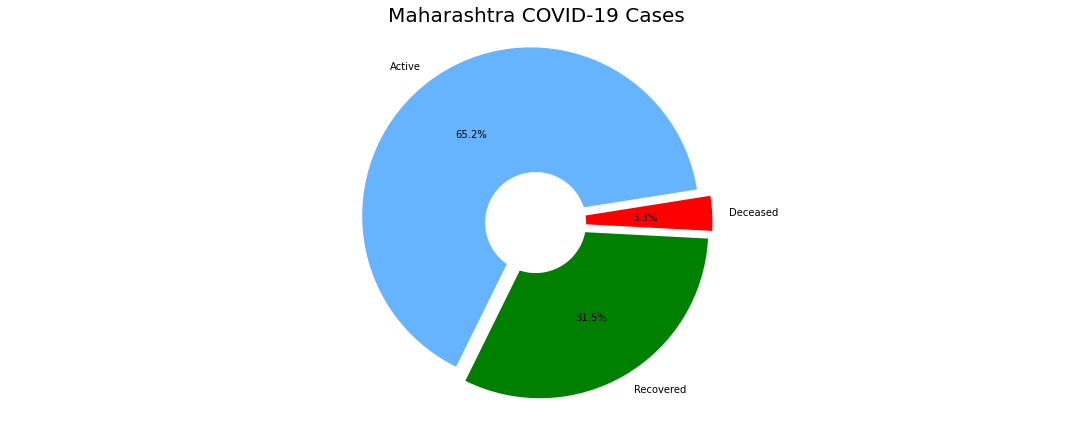

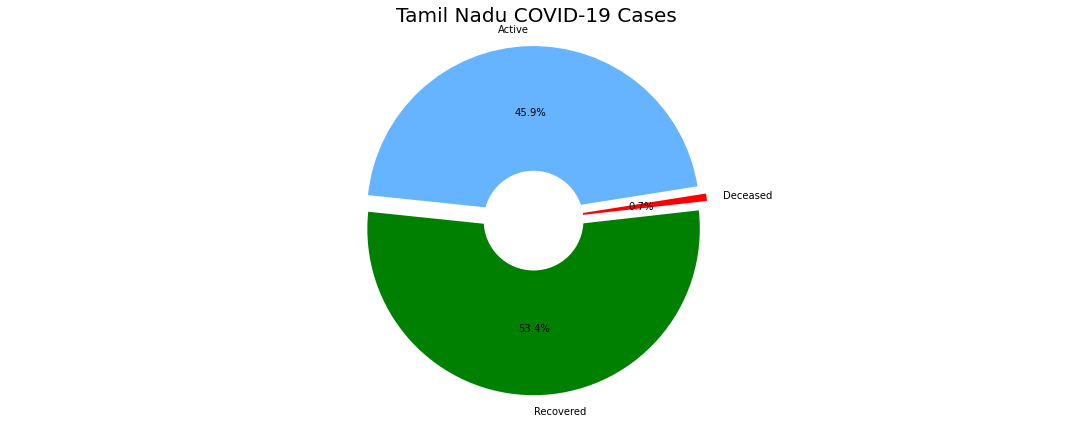

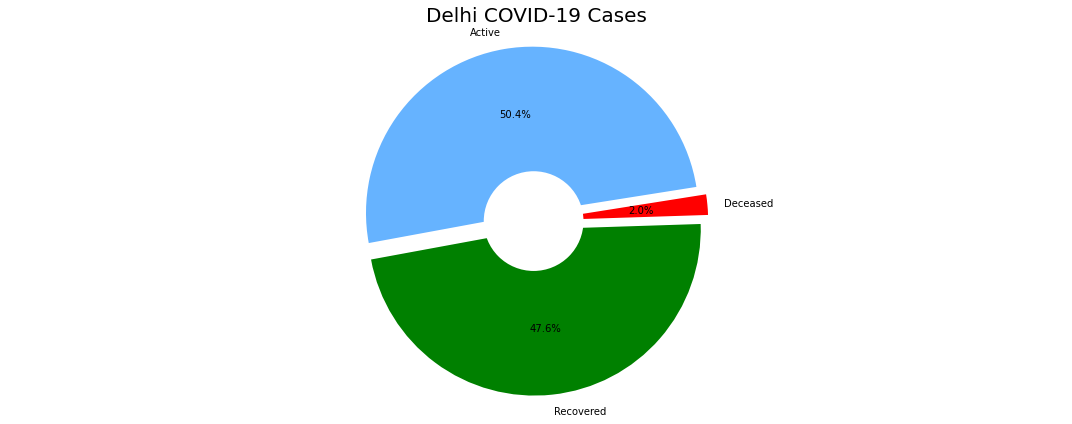

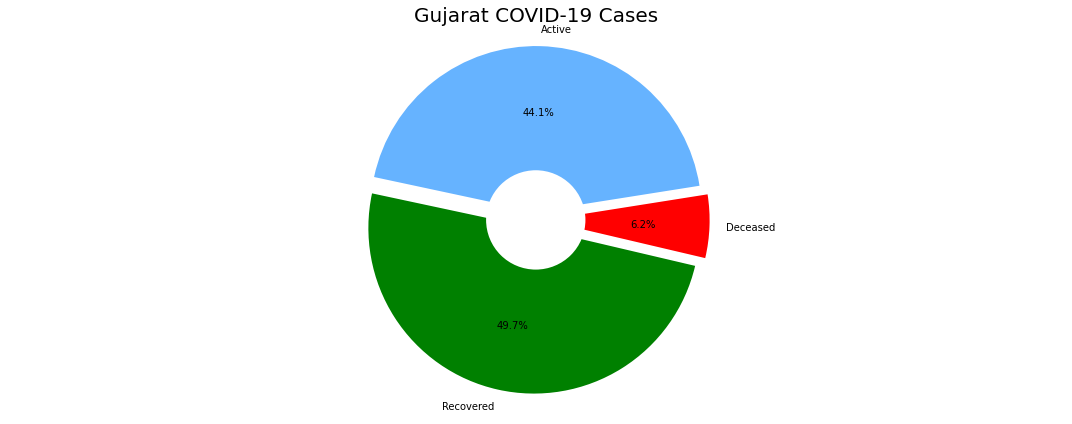

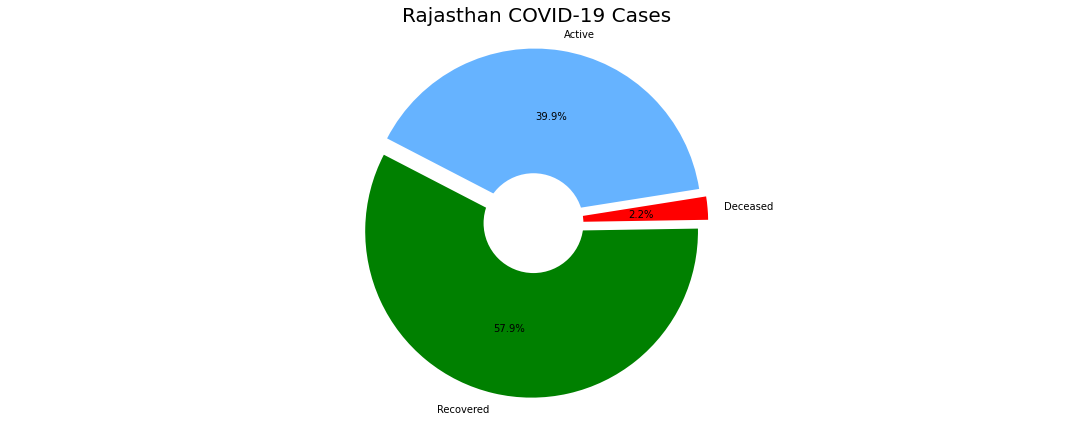

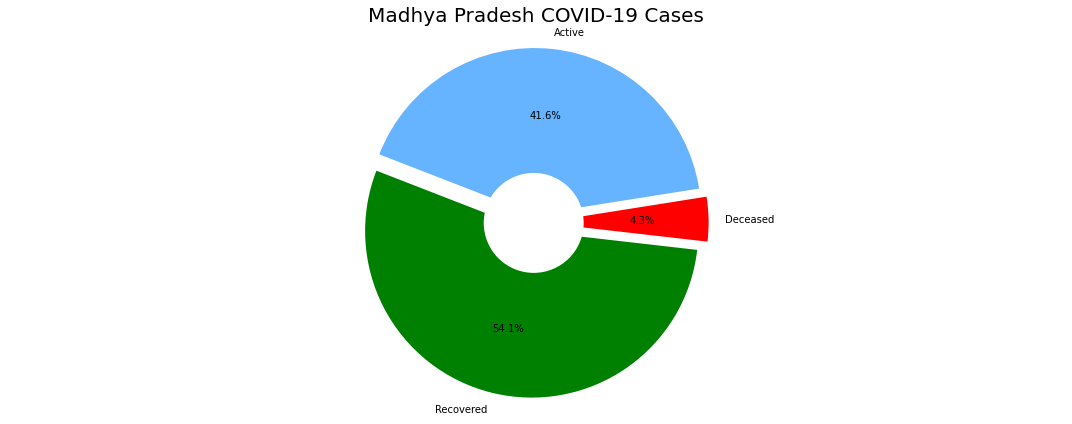

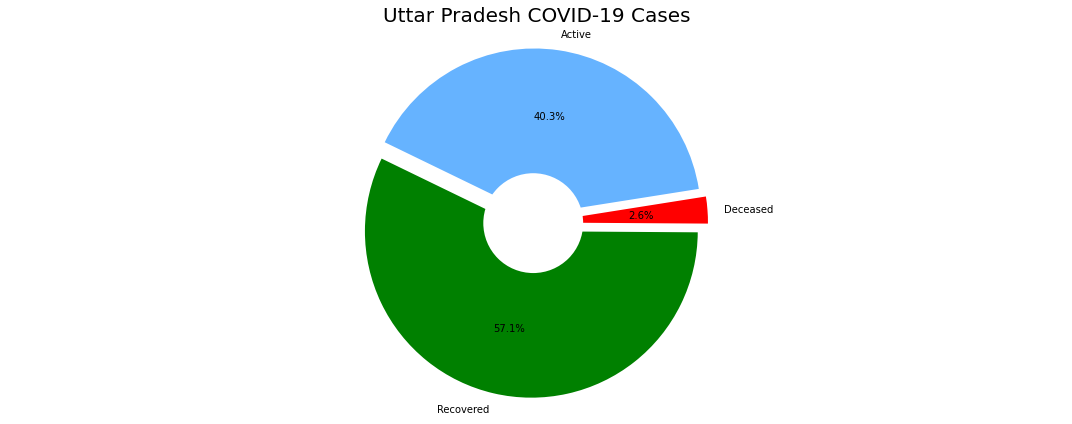

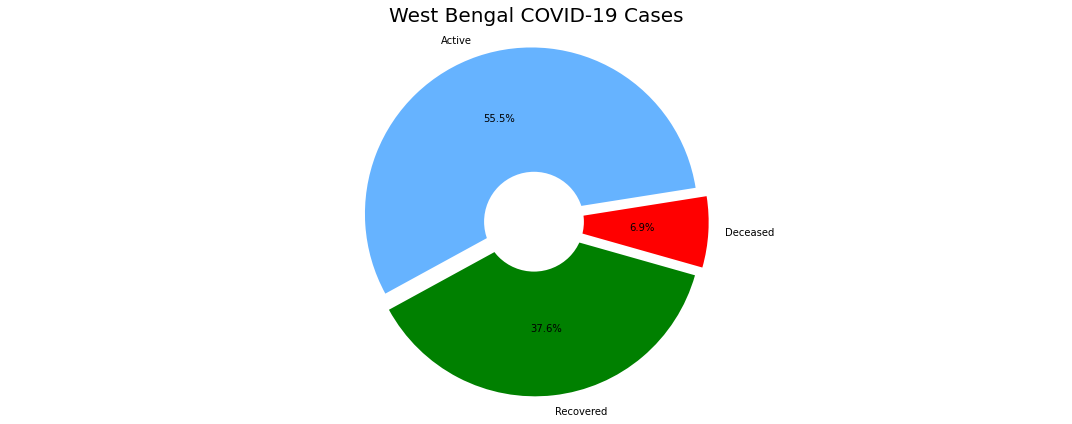

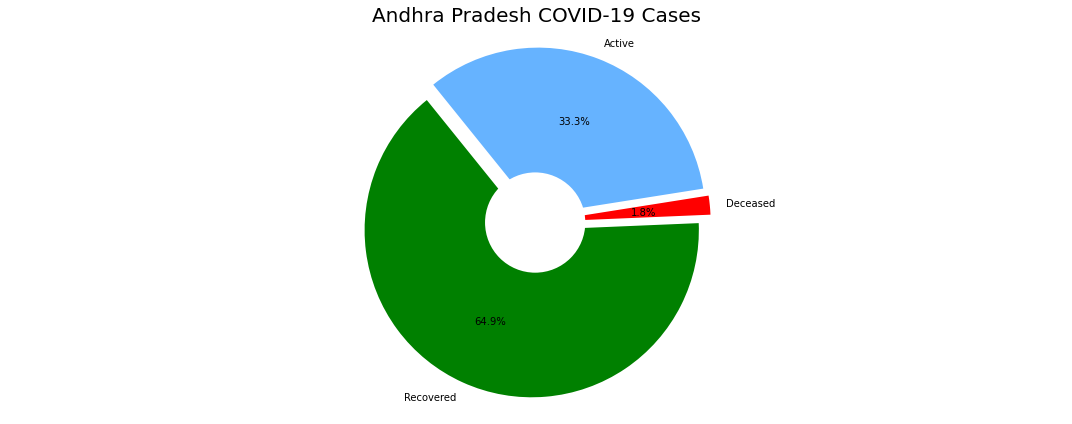

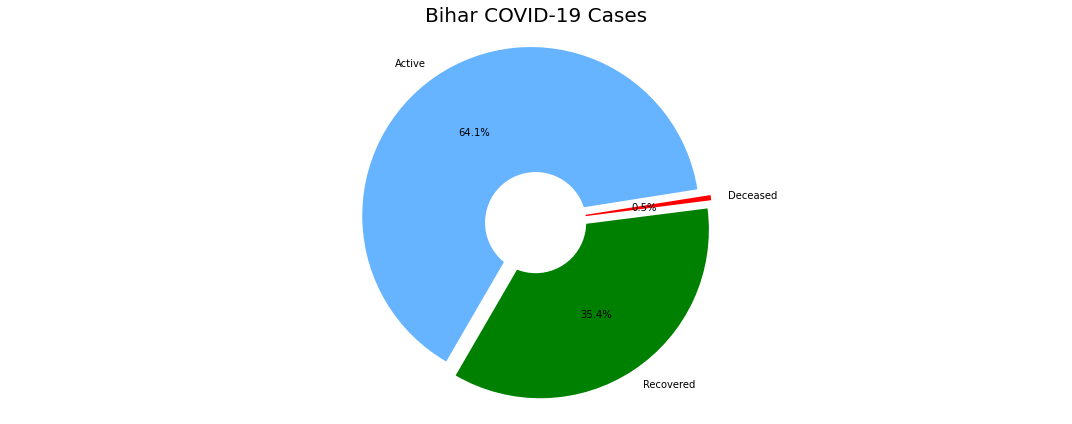

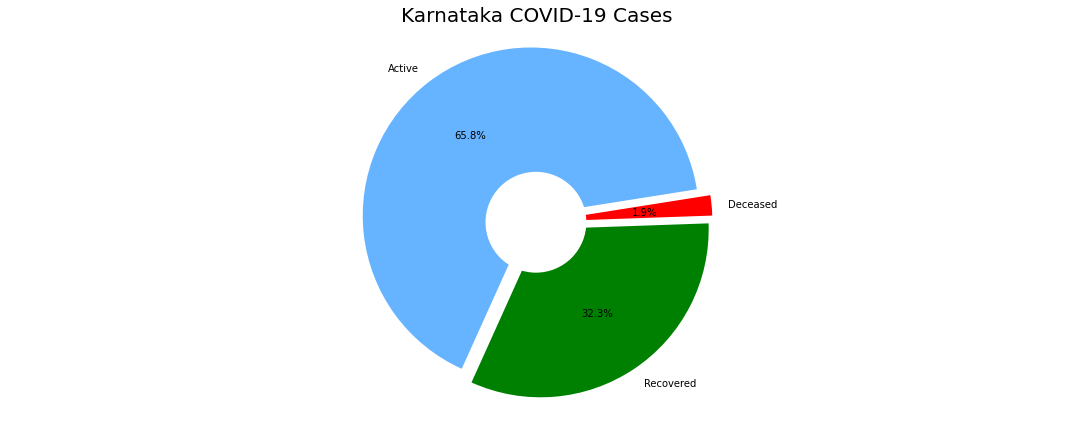

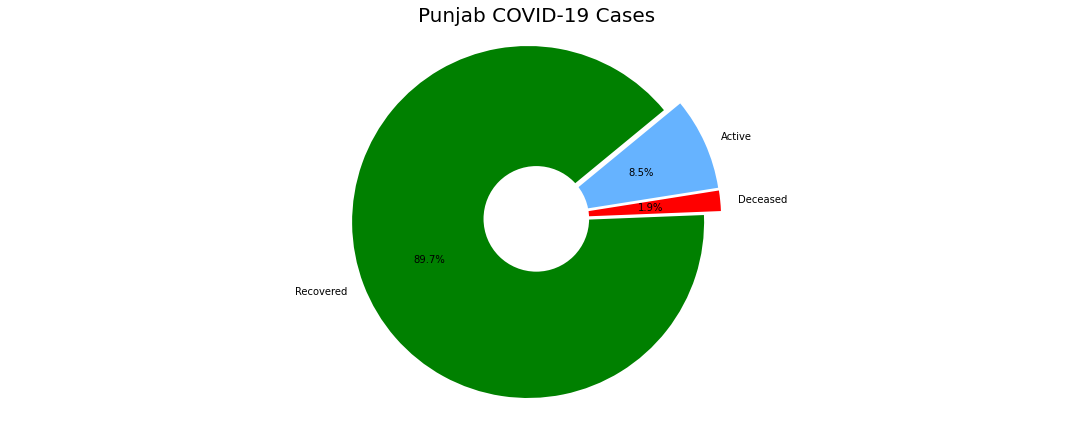

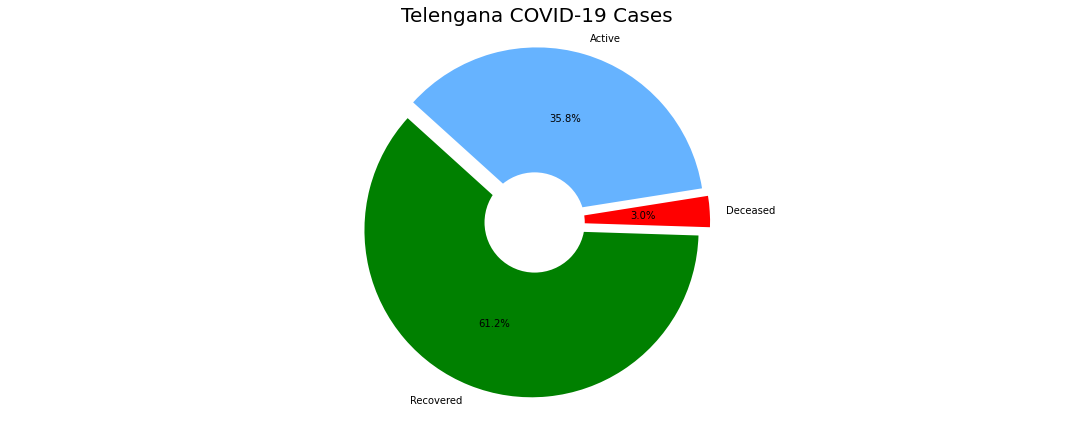

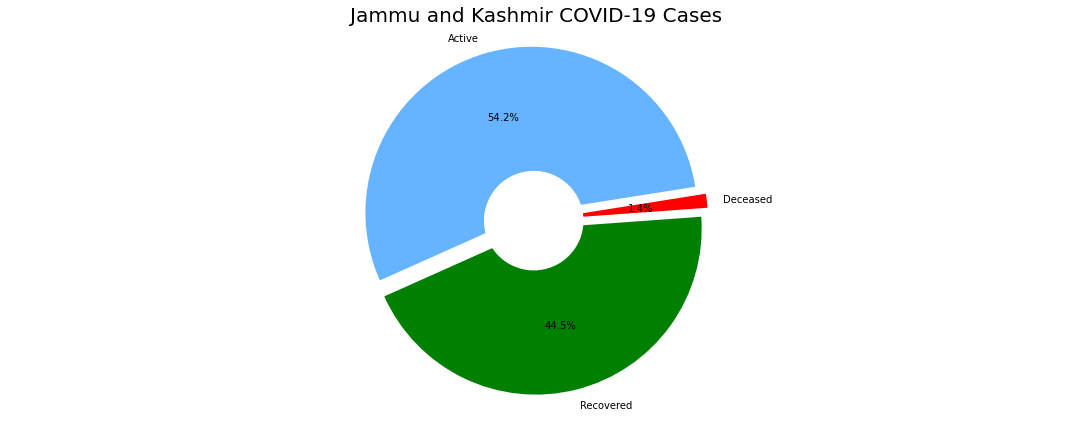

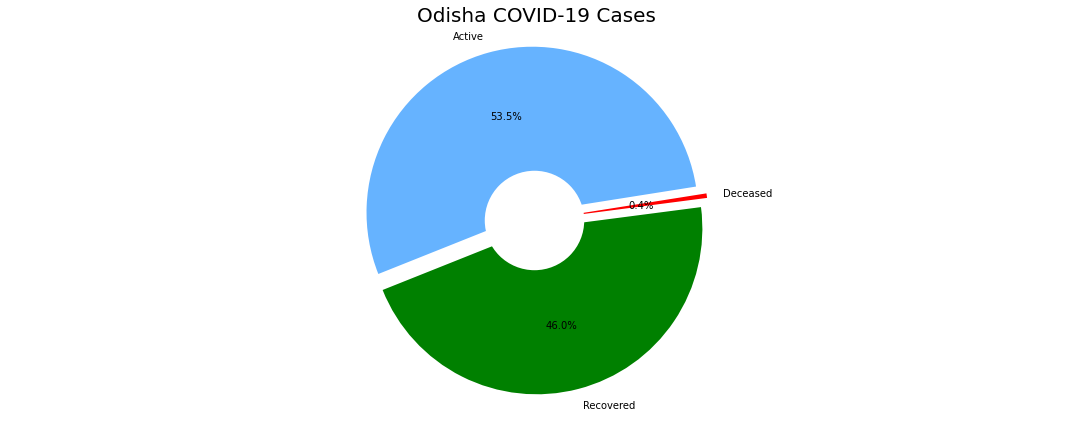

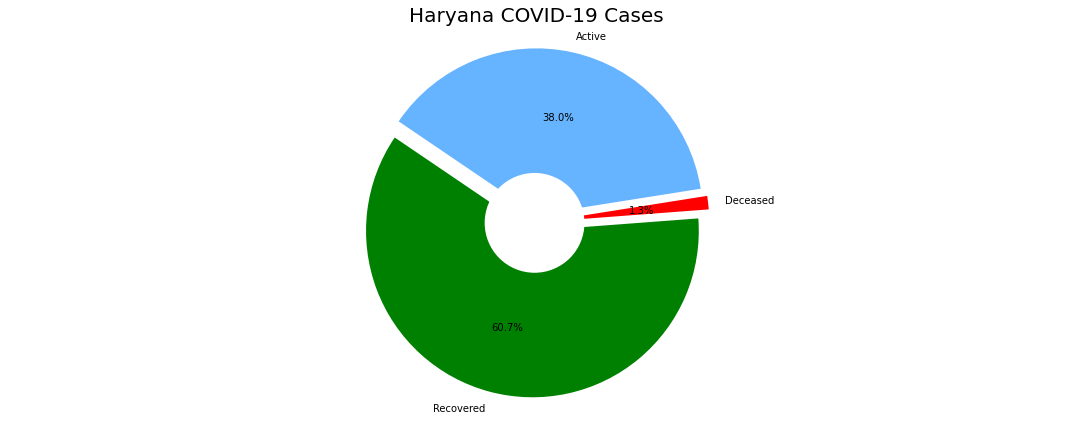

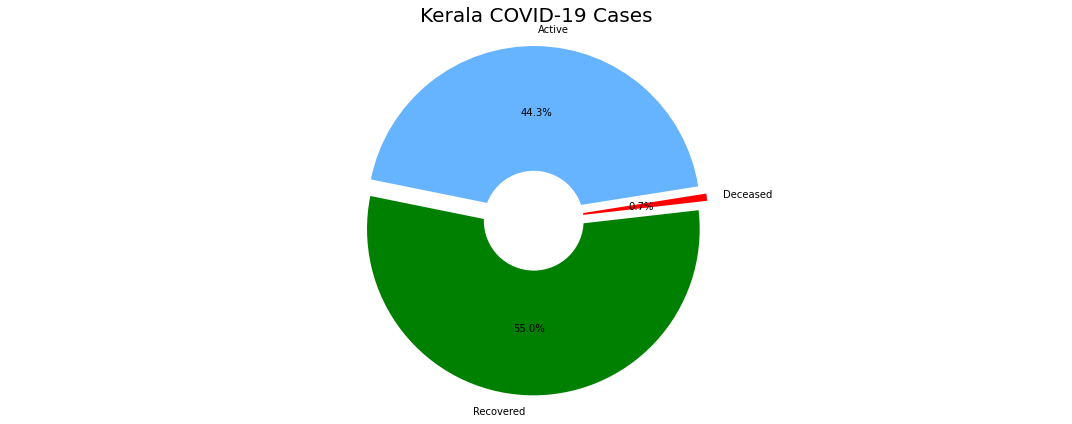

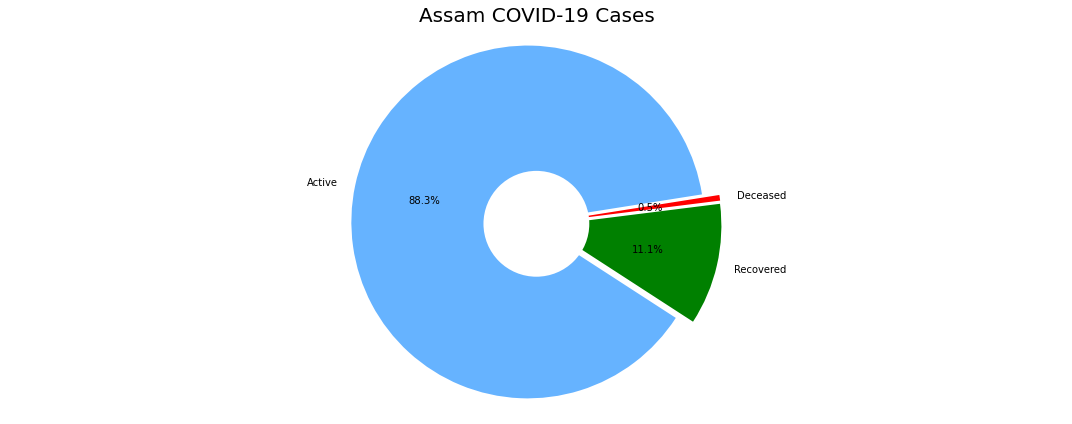

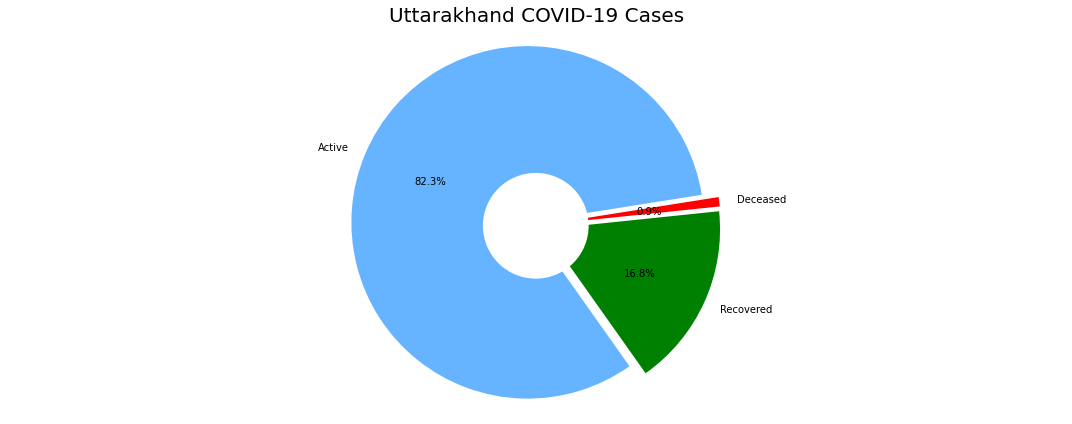

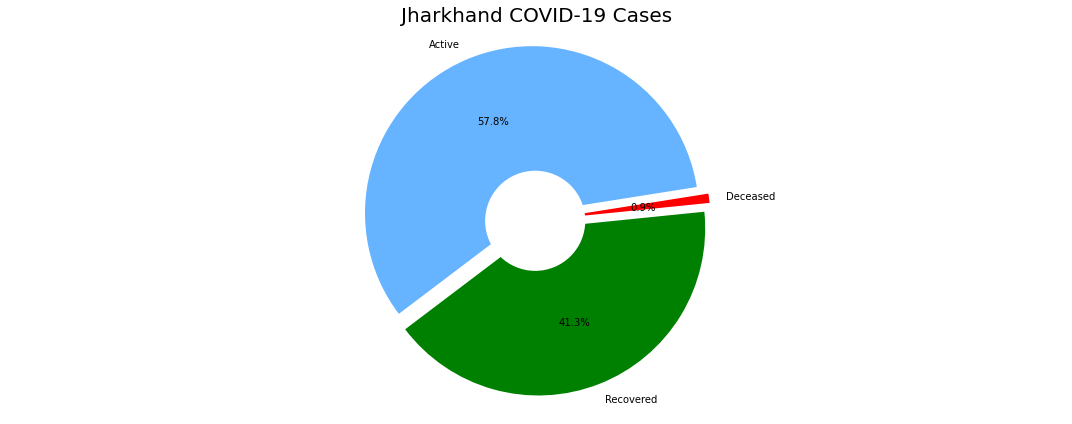

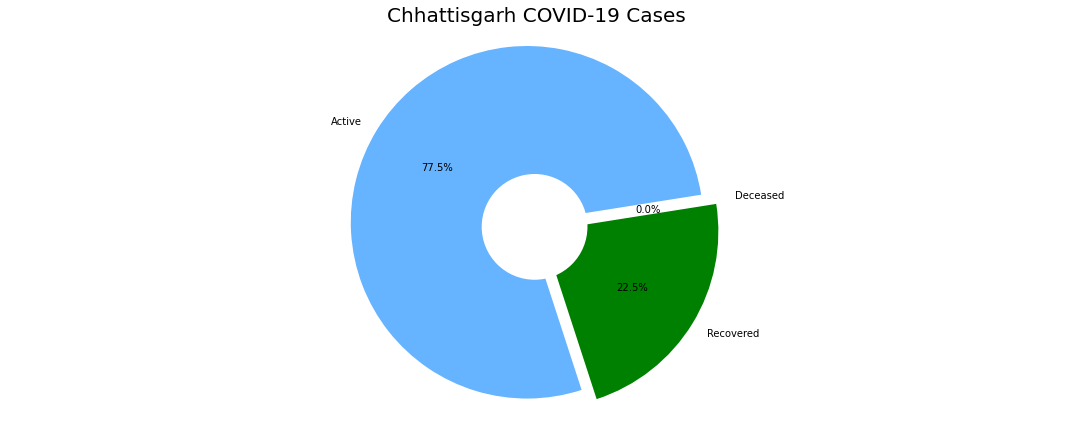

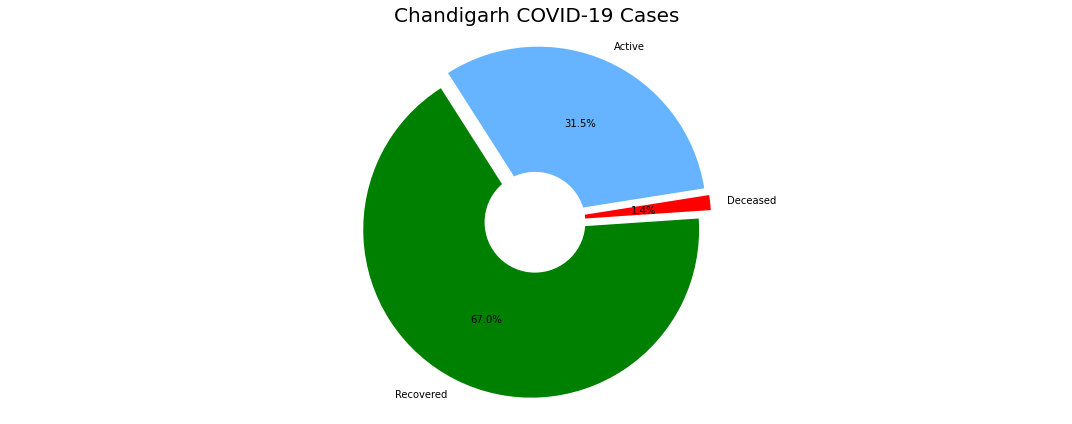

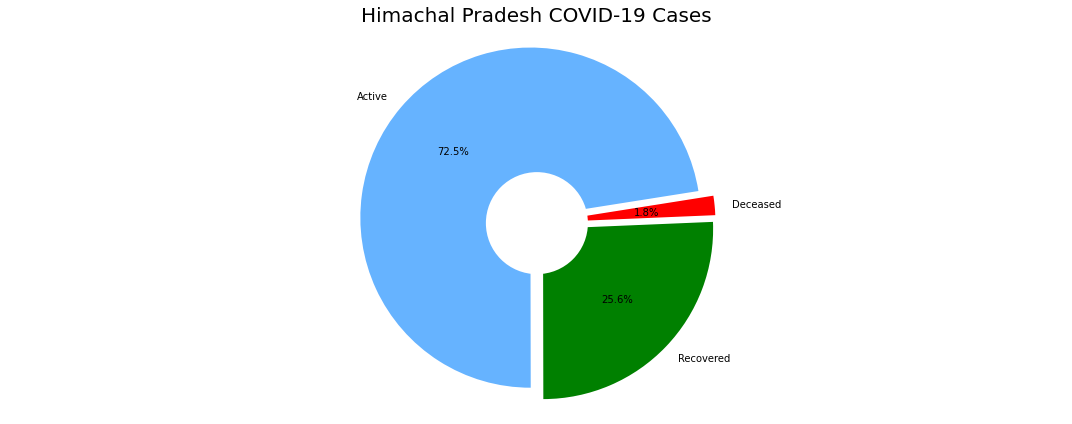

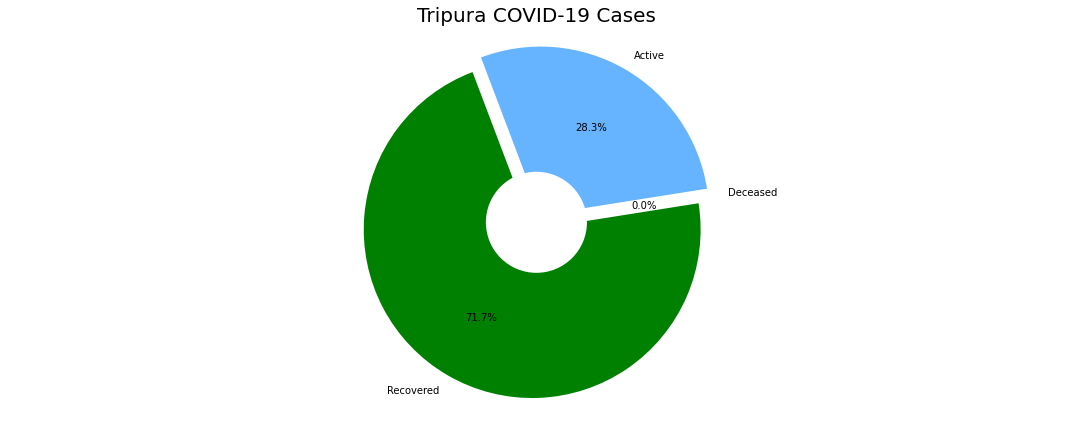

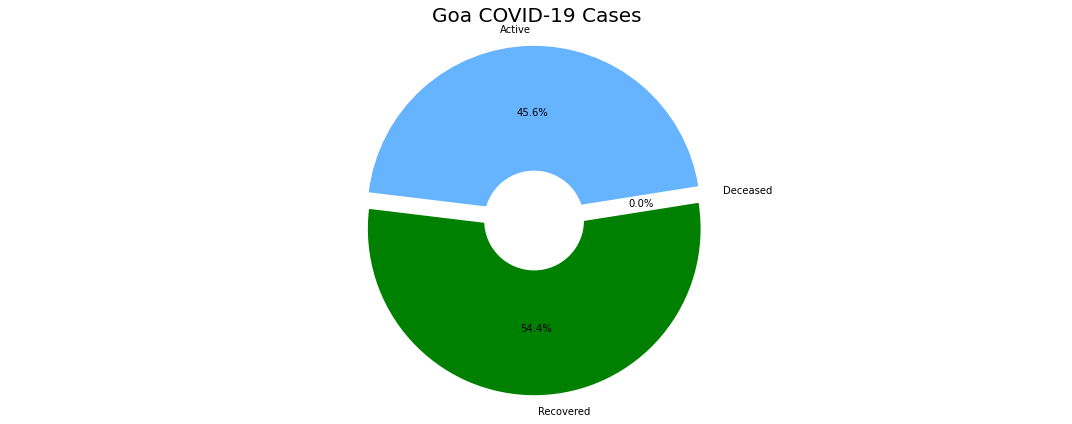

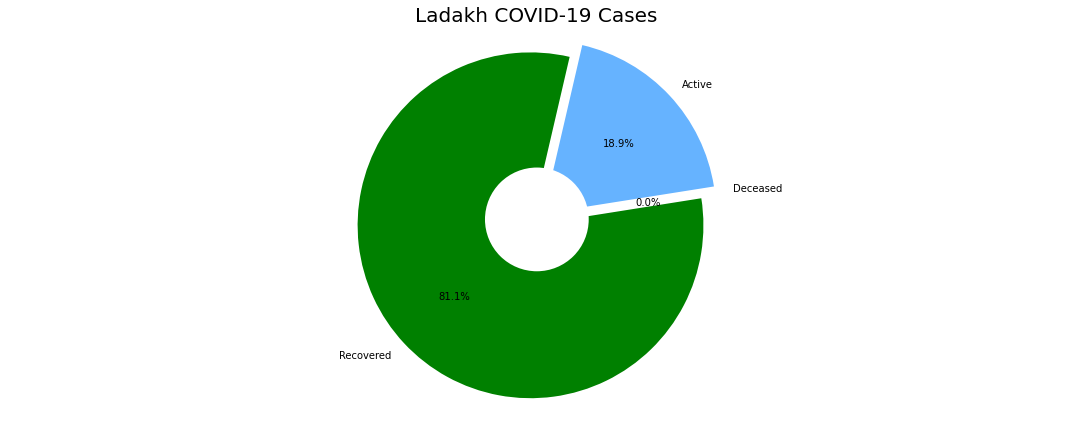

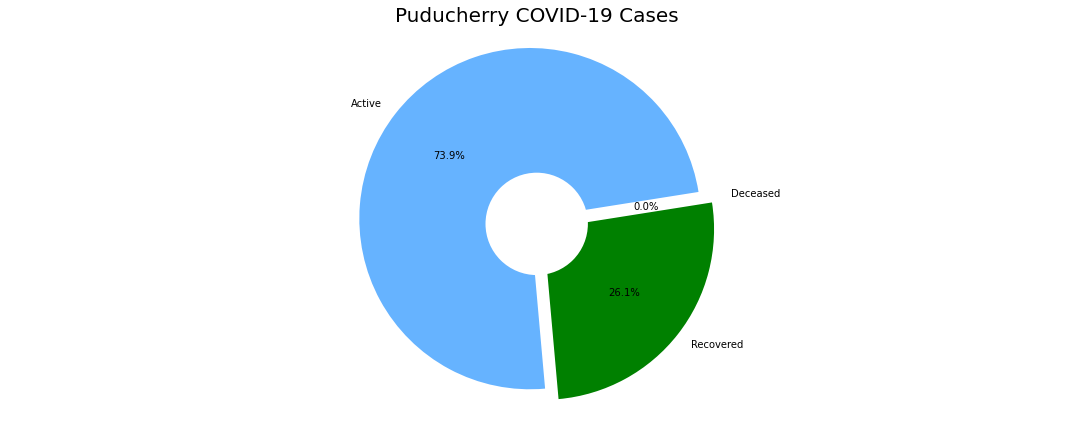

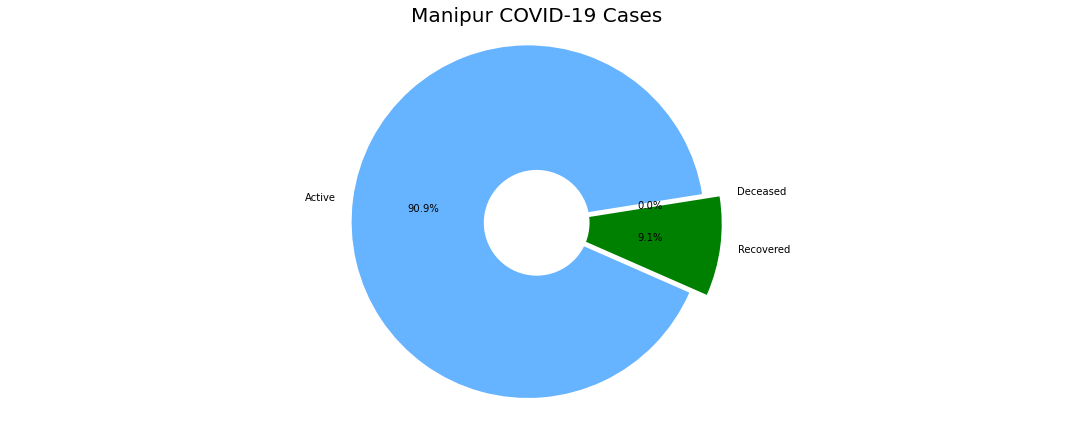

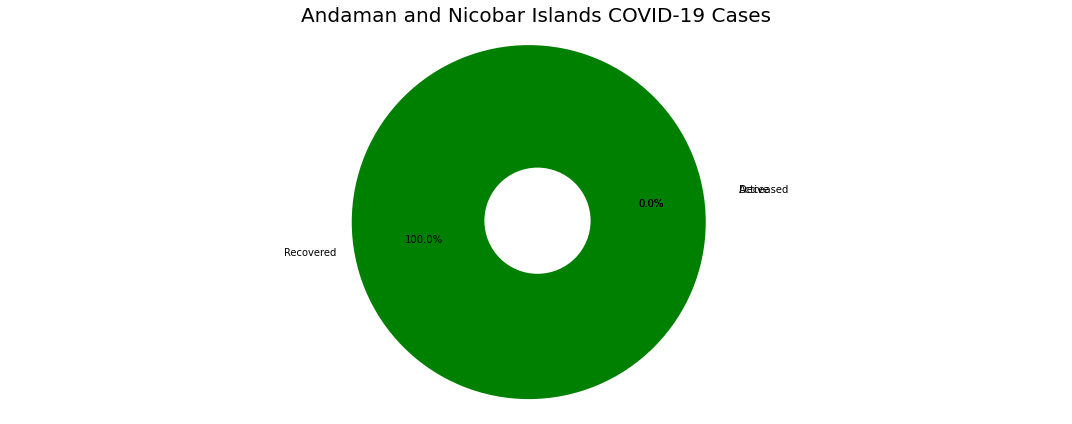

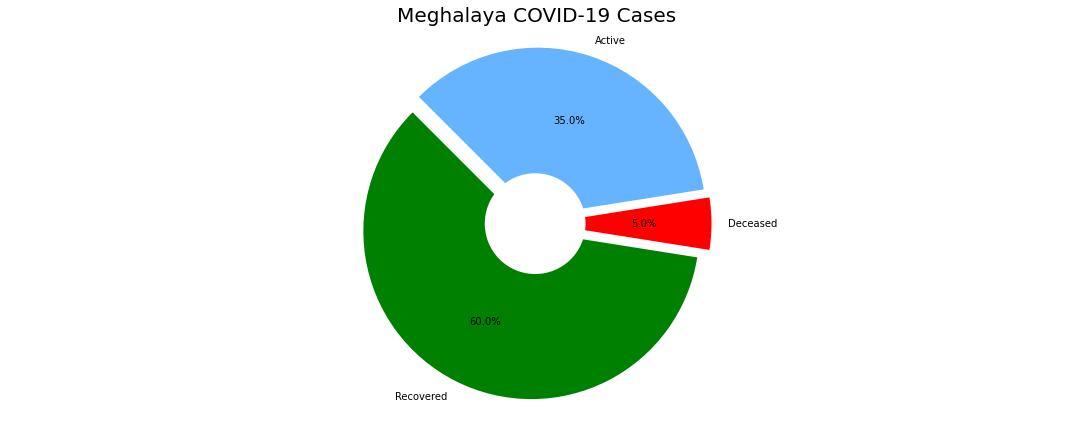

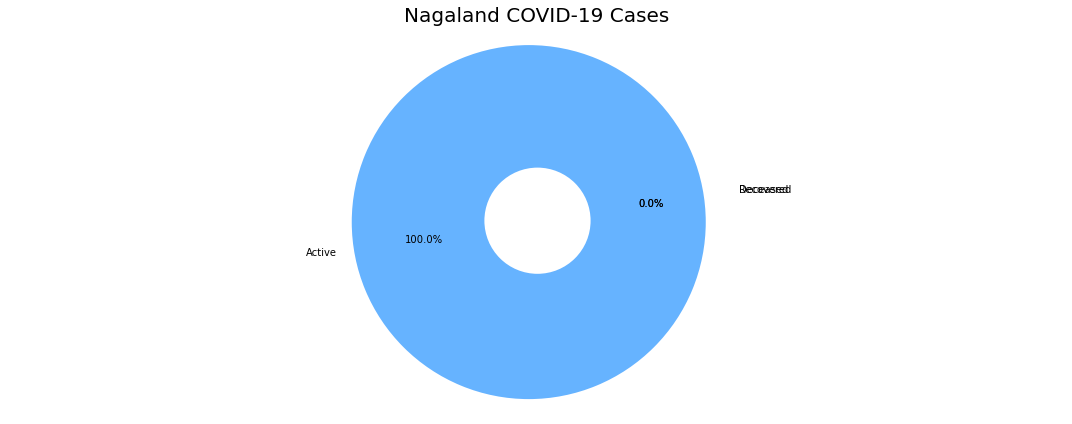

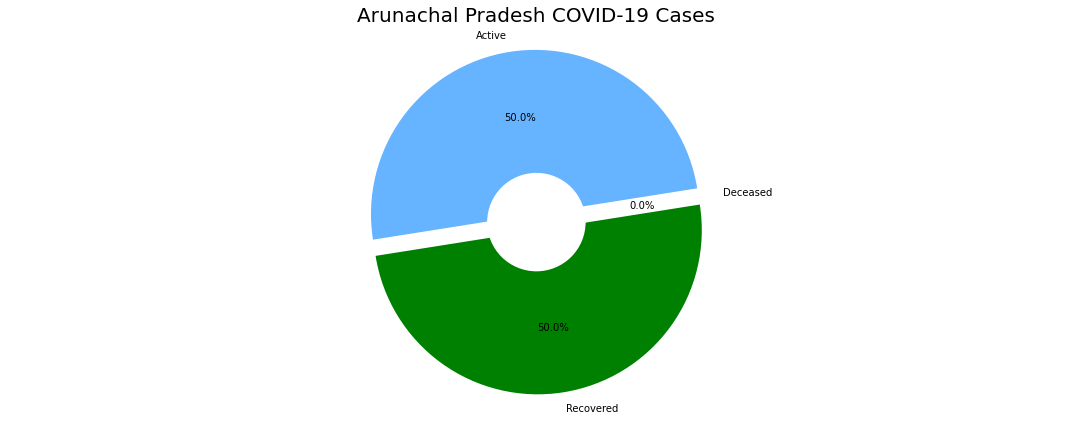

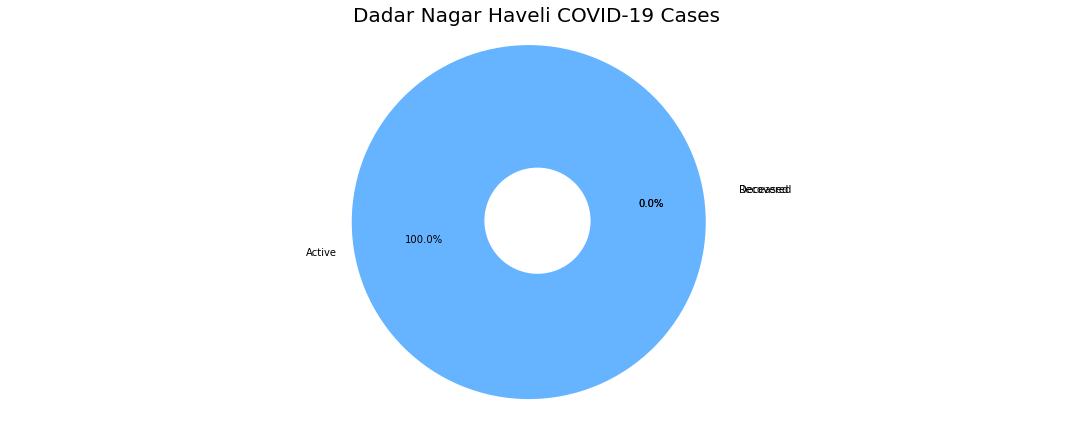

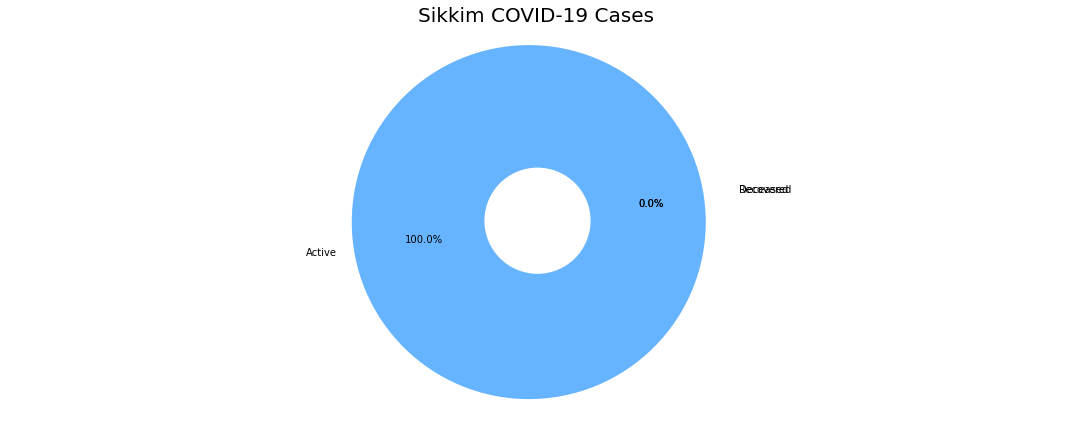

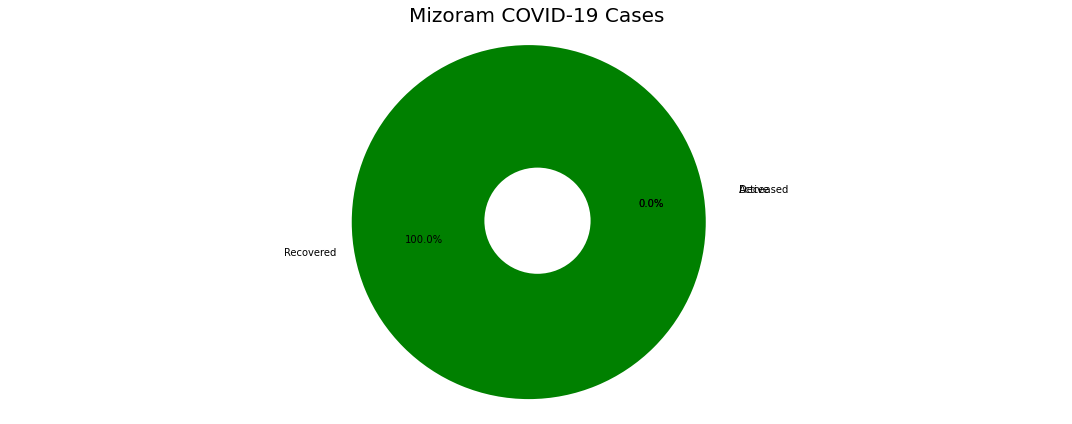

In [159]:
total_cases_india = 0
cured_cases_india = 0
death_cases_india = 0
active_cases_india = 0
state_df = pd.DataFrame()

for state in States:
    one_state_df = df_final_India.loc[df_final_India['State/UnionTerritory'] == state,:]
    state_df = pd.concat([state_df,pd.DataFrame(one_state_df.iloc[-1,:]).T],axis = 0)
    total_cases = one_state_df['Confirmed'].values[-1]
    cured = one_state_df['Cured'].values[-1]
    deaths = one_state_df['Deaths'].values[-1]
    active = total_cases - cured - deaths
    plot_pie(active, cured, deaths,state)
    total_cases_india += total_cases
    cured_cases_india += cured
    death_cases_india += deaths
    active_cases_india += active

In [163]:
state_df.reset_index(inplace = True,drop = True)
state_df

,State/UnionTerritory,Date,Sno,Cured,Deaths,Confirmed,New Cases
0,Maharashtra,2020-05-29,2434,17918,1897,56948,0
1,Tamil Nadu,2020-05-29,2444,9909,133,18545,0
2,Delhi,2020-05-29,2423,7264,303,15257,0
3,Gujarat,2020-05-29,2425,7549,938,15195,0
4,Rajasthan,2020-05-29,2442,4457,173,7703,0
5,Madhya Pradesh,2020-05-29,2433,3927,313,7261,0
6,Uttar Pradesh,2020-05-29,2448,3991,182,6991,0
7,West Bengal,2020-05-29,2449,1578,289,4192,0
8,Andhra Pradesh,2020-05-29,2416,2057,58,3171,0
9,Bihar,2020-05-29,2419,1083,15,3061,0


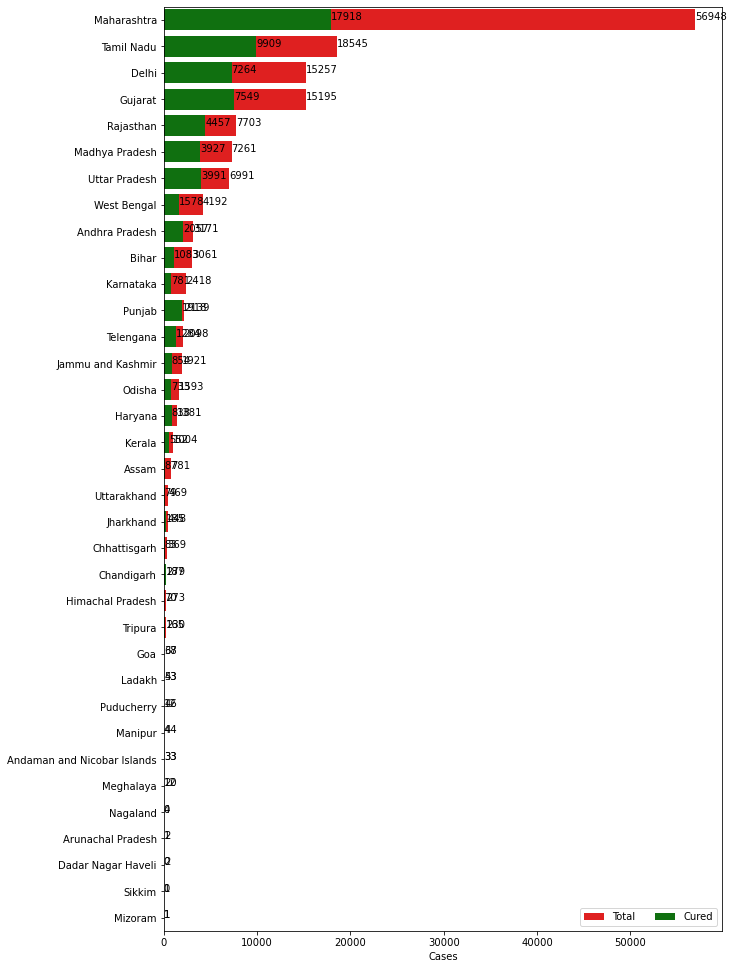

In [184]:
f, ax = plt.subplots(figsize=(10, 17))
data = state_df[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Cases")

i = 0
for p in ax.patches:
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height()/2
    if i <= len(States):
        ax.annotate(str(int(p.get_width())), (x, y))
    else:
        ax.annotate(int(p.get_width()), (x, y))  
    i += 1


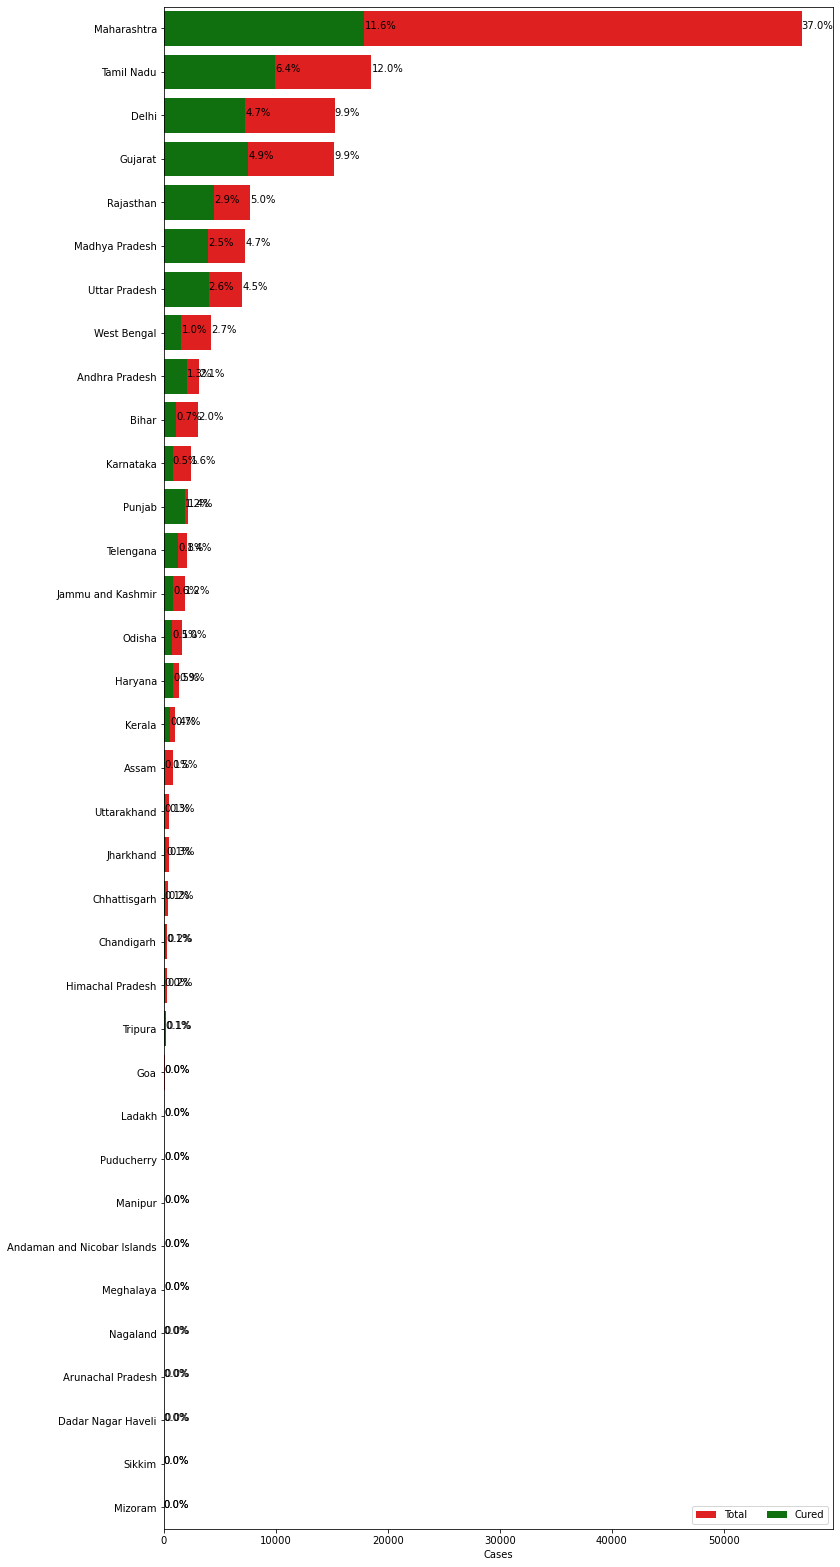

In [182]:
f, ax = plt.subplots(figsize=(12, 28))
data = state_df[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Cases")
total = total_cases_india
i = 0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height()/2
    if i <= len(States):
        ax.annotate(str(percentage), (x, y))
    else:
        ax.annotate(percentage, (x, y))
        
    i += 1

The COVID-19 Cases Statistics in India is-

Total Confirmed cases:  154001.0
Total Recovereded cases:  67692.0
Total Active cases:  81778.0
Total Deceased cases:  4531.0


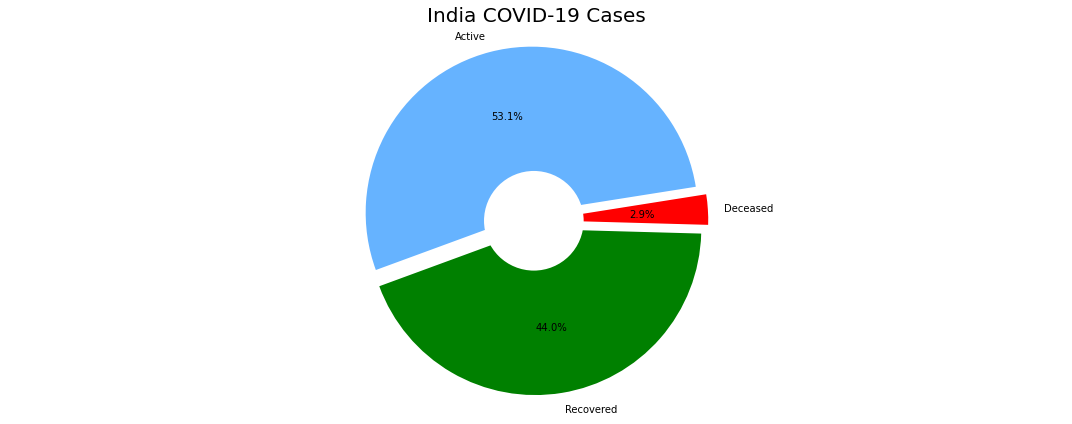

In [190]:
print('The COVID-19 Cases Statistics in India is-\n')

print("Total Confirmed cases: ", total_cases_india)
print("Total Recovereded cases: ", cured_cases_india)
print("Total Active cases: ", active_cases_india)
print("Total Deceased cases: ", death_cases_india)
plot_pie(active_cases_india, cured_cases_india, death_cases_india, "India")

In [191]:
India_coord.rename(columns = {"Name of State / UT" : "State/UnionTerritory"},inplace = True)

In [195]:
print(set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values)))

{'Tripura ', 'Ladakh', 'Assam ', 'Arunachal Pradesh', 'Chhattisgarh ', 'Jharkhand', 'Manipur ', 'Jammu and Kashmir', 'Puducherry ', 'Chandigarh', 'Bihar ', 'Sikkim', 'Tripura', 'Andaman And Nicobar ', 'Orissa ', 'Meghalaya ', 'Union Territory of Jammu and Kashmir', 'Dadra And Nagar Haveli ', 'Sikkim ', 'Mizoram ', 'West Bengal', 'Odisha', 'Chhattisgarh', 'Goa', 'Nagaland', 'Mizoram', 'West Bengal ', 'Bihar', 'Madhya Pradesh ', 'Puducherry', 'Manipur', 'Goa ', 'Chandigarh ', 'Meghalaya', 'Gujarat', 'Himachal Pradesh ', 'Himachal Pradesh', 'Jharkhand ', 'Madhya Pradesh', 'Assam', 'Arunachal Pradesh ', 'Lakshadweep ', 'Dadar Nagar Haveli', 'Nagaland ', 'Andaman and Nicobar Islands', 'Union Territory of Ladakh'}


In [197]:
India_coord['State/UnionTerritory'] = India_coord['State/UnionTerritory'].str.strip()
state_df['State/UnionTerritory'] = state_df['State/UnionTerritory'].str.strip()

In [198]:
print(set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values)))

{'Andaman And Nicobar', 'Ladakh', 'Jammu and Kashmir', 'Union Territory of Jammu and Kashmir', 'Orissa', 'Dadra And Nagar Haveli', 'Odisha', 'Gujarat', 'Lakshadweep', 'Dadar Nagar Haveli', 'Andaman and Nicobar Islands', 'Union Territory of Ladakh'}


In [199]:
India_coord.loc[India_coord.shape[0]] = ['Gujarat','22.2587','71.1924']
India_coord

,State/UnionTerritory,Latitude,Longitude
0,Andaman And Nicobar,11.667,92.736
1,Andhra Pradesh,14.7504,78.57
2,Arunachal Pradesh,27.1004,93.6166
3,Assam,26.75,94.2167
4,Bihar,25.7854,87.48
5,Chandigarh,30.72,76.78
6,Chhattisgarh,22.0904,82.16
7,Dadra And Nagar Haveli,20.2666,73.0166
8,Delhi,28.67,77.23
9,Goa,15.492,73.818


In [200]:
print(set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values)))

{'Andaman And Nicobar', 'Ladakh', 'Jammu and Kashmir', 'Union Territory of Jammu and Kashmir', 'Orissa', 'Dadra And Nagar Haveli', 'Odisha', 'Lakshadweep', 'Dadar Nagar Haveli', 'Andaman and Nicobar Islands', 'Union Territory of Ladakh'}


In [202]:
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Andaman And Nicobar", 
                                        "Andaman and Nicobar Islands",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Union Territory of Jammu and Kashmir", 
                                        "Jammu and Kashmir",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Union Territory of Ladakh", 
                                        "Ladakh",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Orissa", 
                                        "Odisha",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Dadra And Nagar Haveli", 
                                        "Dadar Nagar Haveli",India_coord['State/UnionTerritory'])

In [204]:
print(set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values)))

{'Lakshadweep'}


In [205]:
df_full = pd.merge(India_coord,state_df,on='State/UnionTerritory').reset_index(drop = True)
df_full

,State/UnionTerritory,Latitude,Longitude,Date,Sno,Cured,Deaths,Confirmed,New Cases
0,Andaman and Nicobar Islands,11.667,92.736,2020-05-29,2415,33,0,33,0
1,Andhra Pradesh,14.7504,78.57,2020-05-29,2416,2057,58,3171,0
2,Arunachal Pradesh,27.1004,93.6166,2020-05-29,2417,1,0,2,0
3,Assam,26.75,94.2167,2020-05-29,2418,87,4,781,0
4,Bihar,25.7854,87.48,2020-05-29,2419,1083,15,3061,0
5,Chandigarh,30.72,76.78,2020-05-29,2420,187,4,279,0
6,Chhattisgarh,22.0904,82.16,2020-05-29,2421,83,0,369,0
7,Dadar Nagar Haveli,20.2666,73.0166,2020-05-29,2422,0,0,2,0
8,Delhi,28.67,77.23,2020-05-29,2423,7264,303,15257,0
9,Goa,15.492,73.818,2020-05-29,2424,37,0,68,0


In [208]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

In [209]:
df_daywise_India = df_final_India.groupby("Date")['Confirmed','Cured','Deaths',"New Cases"].sum().reset_index()
df_daywise_India

,Date,Confirmed,Cured,Deaths,New Cases
0,2020-01-31,1.0,0.0,0.0,0.0
1,2020-02-01,2.0,0.0,0.0,1.0
2,2020-02-02,3.0,0.0,0.0,1.0
3,2020-02-03,3.0,0.0,0.0,0.0
4,2020-02-04,3.0,0.0,0.0,0.0
...,...,...,...,...,...
115,2020-05-25,136203.0,57721.0,4021.0,6673.0
116,2020-05-26,142410.0,60491.0,4167.0,6207.0
117,2020-05-27,147754.0,64426.0,4337.0,5344.0
118,2020-05-28,154001.0,67692.0,4531.0,6247.0


In [241]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_daywise_India['Date'], y = df_daywise_India['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(180, 210, 200)')
fig.show()

In [236]:
fig = px.bar(df_daywise_India, x="Date", y="New Cases", barmode='group', height=500)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(180, 190, 200)')
fig.show()

In [239]:
fig = px.bar(df_daywise_India, x="Date", y="Confirmed", color='Confirmed', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 220, 230)')
fig.show()

In [245]:
fig = px.line(x=df_daywise_India['Date'], y=df_daywise_India['New Cases'], labels = {'x': "Dates",'y': "Counts"})
fig.update_layout( showlegend=False,title_text="Trend of Coronavirus cases")
fig.update_layout(plot_bgcolor='rgb(260, 222, 222)')
fig.show()

**Forecasting**

In [250]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [249]:
df = df_daywise_India.iloc[:-1,]
df_train = df.loc[df['Date']<= "2020-05-23",:]
df_test = df.loc[df['Date'] > "2020-05-23",:]